In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**memanggil dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum10/data/weather_classification_data.csv')

df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


**cek missing value**

In [6]:
print(df.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


**melihat nilai unique**

In [7]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Temperature: [ 14.  39.  30.  38.  27.  32.  -2.   3.  28.  35.  12. -10.  24.  10.
  33.  43.  13.  -7.  26.   4.  17.  40.   2.  15.  29.  11.  -9.  36.
  42.  21.  22.  25.  -4.  -1.  -5.  41.  31.  16.  34.  49.  19.  23.
  20.  -3.  18.   1.   0.  46.  44. -13.  -6.  78.  63.  73.   8. -12.
 -24.  -8.  60.  48.   5.  51. -14.  50.  37.  54.  47.  70.   9.  66.
 -16. -15.  59.  80. -19.  52.  45.   6. -18. -11.  74.  76.  55. -20.
  57.  91.  82. -17.  61.   7.  53.  65.  77.  67.  64.  58.  68.  72.
  62.  71.  56. 107. -22.  75.  85.  97.  84. -21.  92. -25.  81. 109.
  98.  94.  90. -23.  88.  99.  69. 100.  89. 102.  86. 108.  87.  95.]
Humidity: [ 73  96  64  83  74  55  97  85  45  43  59  87  21  50  27  51  46 102
  67  88  36  79  72  57  61  70  95  69  90 105  49  37  22  54  66  25
  91  98  94  41  84  63  75  52  89  47  81  62  31  68  35  78  56  93
  44  38  24  82  65  80  39  48  60  29  99  92  76  77  86  32  58  42
  30 100  33  71 107 108  26 106  28 109 101 

**analisis korelasi**

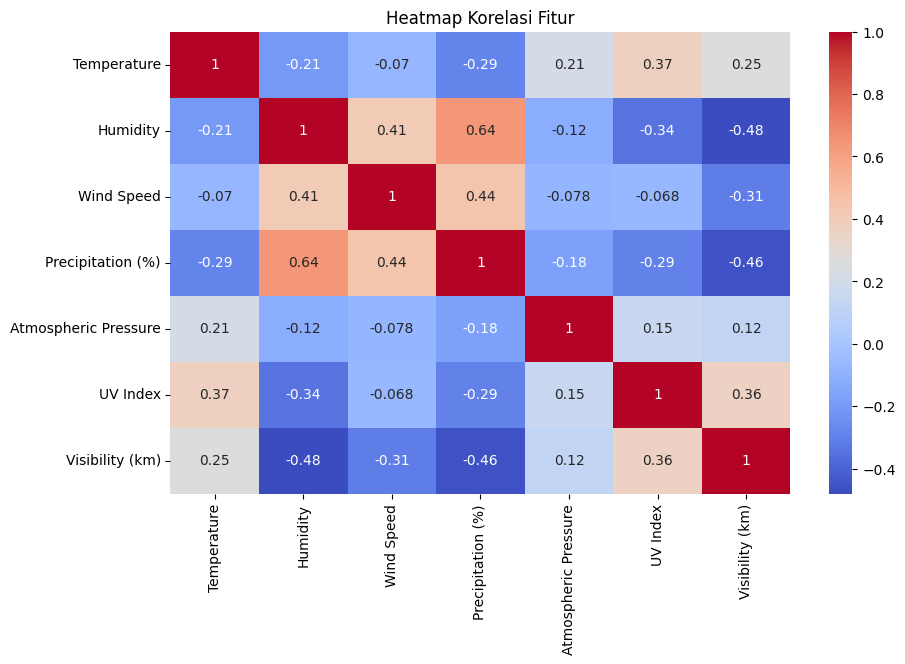

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [9]:
df.rename(columns={"Wheather Type": "WheaterType"}, inplace=True)
print(df.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')


**visualisasi**

/tmp/ipython-input-481721868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[target], palette="pink")


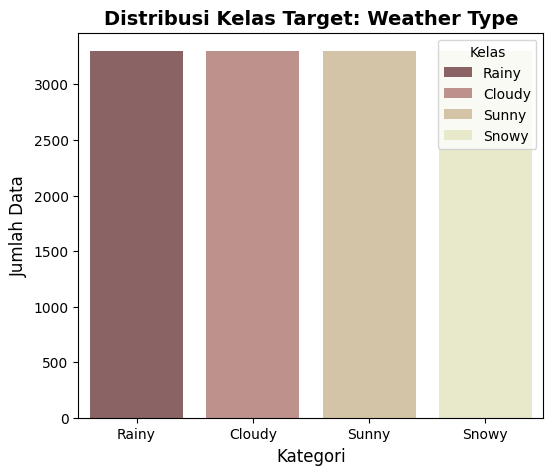

In [10]:
target = "Weather Type"

plt.figure(figsize=(6,5))
ax = sns.countplot(x=df[target], palette="pink")

plt.title(f"Distribusi Kelas Target: {target}", fontsize=14, weight='bold')
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)

# Tambahkan legend manual (karena countplot tidak otomatis memakai legend)
unique_labels = df[target].unique()
ax.legend(unique_labels, title="Kelas", loc="upper right")

plt.show()

**pemisahan data dan normalisasi**

In [11]:
target = "Weather Type"

X = df.drop(columns=[target])
y = df[target]

# Identifikasi kolom kategorikal
categorical_cols = X.select_dtypes(include='object').columns

# Lakukan One-Hot Encoding pada kolom kategorikal
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Normalisasi fitur numerik yang sudah di-encode
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

**menangani ketidakseimbangan kelas dengan SMOTE**

In [12]:
print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1) # Set k_neighbors to 1
x_train_smote, y_train_smote = sm.fit_resample(X_train, y_train) # Corrected variable name to X_train

print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Weather Type
Sunny     2659
Rainy     2653
Cloudy    2649
Snowy     2599
Name: count, dtype: int64
After SMOTE:
Weather Type
Rainy     2659
Sunny     2659
Cloudy    2659
Snowy     2659
Name: count, dtype: int64


**mencari parameter k yang terbaik**

In [13]:
param_grid = {
    'n_neighbors': list(range(1, 11)),     # cukup 1–10 saja
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=3,        # cv 3 cukup untuk dataset sedang
    n_jobs=-1,
    verbose=1    # tampilkan progress
)

grid.fit(x_train_smote, y_train_smote)

print("\n===== PARAMETER TERBAIK =====")
print(grid.best_params_)
best_model = grid.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits

===== PARAMETER TERBAIK =====
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


**evaluasi**


===== AKURASI =====
0.8973484848484848

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       651
       Rainy       0.85      0.89      0.87       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.92      0.89      0.91       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640


===== CONFUSION MATRIX =====


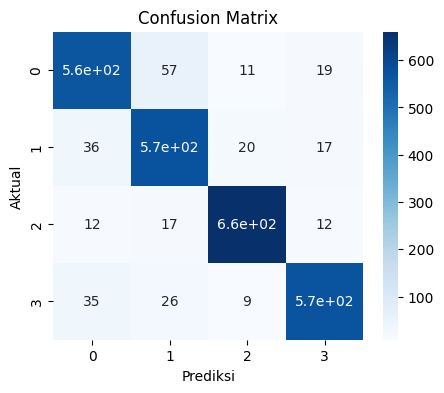

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Added accuracy_score import

y_pred = best_model.predict(X_test)

print("\n===== AKURASI =====")
print(accuracy_score(y_test, y_pred))

print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_pred))

print("\n===== CONFUSION MATRIX =====")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [15]:
cv_scores = cross_val_score(best_model, x_train_smote, y_train_smote, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.897612021944848
Std Dev: 0.008138123622918013


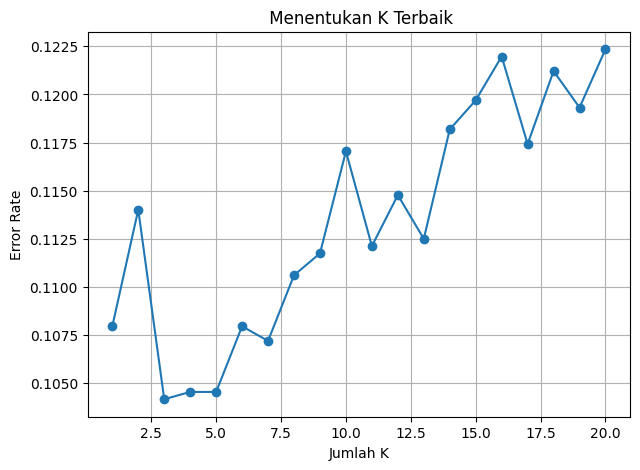

In [16]:
error_rates = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))

plt.figure(figsize=(7,5))
plt.plot(range(1, 21), error_rates, marker='o')
plt.title(" Menentukan K Terbaik")
plt.xlabel("Jumlah K")
plt.ylabel("Error Rate")
plt.grid()
plt.show()